<a href="https://colab.research.google.com/github/ycarrera01/Miner-a-de-datos/blob/main/An%C3%A1lisisIPHEestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Se cargan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from itertools import product


In [2]:
# Cargar dataset
df = pd.read_excel("agrupado.xlsx")

In [3]:
#Comprobar que la data est√° cargada correctamente
df.head ()

Fecha_Cierre   A√±o     Mes  N√∫mero_mes     Escuela, Programa, Extensi√≥n  \
0   2021-01-31  2021  Enero            1    Escuela de Ense√±anza Especial   
1   2021-01-31  2021   Enero           1      Escuela Vocacional Especial   
2   2021-01-31  2021   Enero           1                Escuela de Sordos   
3   2021-01-31  2021   Enero           1  Escuela de Ciegos Hellen Keller   
4   2021-01-31  2021   Enero           1              Programa de Autismo   

    C_E_Total  C_E_Hombre  C_E_Mujer  C_E_Contactado  IPHE_Total  IPHE_Hombre  \
0        1476         876        600               0           0            0   
1         593         374        219               0         853          543   
2        1006         624        382               0          24           11   
3         145          94         51               0         105           51   
4         281         199         82               0          76           65   

   IPHE_Mujer  IPHE_Contactados  Ctd_Docentes  
0           0                 0             0  
1         310                 0             0  
2          13                 0             0  
3          54                 0             0  
4          11                 0             0

In [4]:
# Busco conocer el tipo de datos que tiene el dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   A√±o                           525 non-null    int64         
 2   Mes                           525 non-null    object        
 3   N√∫mero_mes                    525 non-null    int64         
 4   Escuela, Programa, Extensi√≥n  525 non-null    object        
 5    C_E_Total                    525 non-null    int64         
 6   C_E_Hombre                    525 non-null    int64         
 7   C_E_Mujer                     525 non-null    int64         
 8   C_E_Contactado                525 non-null    int64         
 9   IPHE_Total                    525 non-null    int64         
 10  IPHE_Hombre                   525 non-null    int64         
 11  IPHE_Mujer                   

In [5]:
#Aplicar la estadistica descriptiva para entender el comportamiento de los datos
df.describe ()

Fecha_Cierre          A√±o  N√∫mero_mes    C_E_Total  C_E_Hombre  \
count                  525   525.000000  525.000000   525.000000  525.000000   
mean   2022-02-01 00:57:36  2021.560000    6.360000   536.579048  133.180952   
min    2021-01-31 00:00:00  2021.000000    1.000000     0.000000    0.000000   
25%    2021-07-31 00:00:00  2021.000000    3.000000   250.000000    0.000000   
50%    2022-01-31 00:00:00  2022.000000    6.000000   373.000000    0.000000   
75%    2022-07-31 00:00:00  2022.000000    9.000000   837.000000  199.000000   
max    2023-03-31 00:00:00  2023.000000   12.000000  1528.000000  955.000000   
std                    NaN     0.571859    3.454436   392.375507  223.659245   

        C_E_Mujer  C_E_Contactado   IPHE_Total  IPHE_Hombre  IPHE_Mujer  \
count  525.000000      525.000000   525.000000   525.000000  525.000000   
mean    77.767619      149.337143   226.828571    62.529524   36.598095   
min      0.000000        0.000000     0.000000     0.000000    0.000000   
25%      0.000000        0.000000    96.000000     0.000000    0.000000   
50%      0.000000        0.000000   162.000000     0.000000    0.000000   
75%    101.000000      153.000000   284.000000    95.000000   56.000000   
max    641.000000     1431.000000  1382.000000   839.000000  543.000000   
std    137.825033      316.069230   227.608017   126.136927   74.783073   

       IPHE_Contactados  Ctd_Docentes  
count        525.000000    525.000000  
mean          56.967619     10.815238  
min            0.000000      0.000000  
25%            0.000000      0.000000  
50%            0.000000      0.000000  
75%           25.000000      0.000000  
max          862.000000    224.000000  
std          139.498656     26.269343

In [6]:
print(df.columns.tolist())

['Fecha_Cierre', 'A√±o', 'Mes', 'N√∫mero_mes', 'Escuela, Programa, Extensi√≥n', ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes']


In [7]:
# Lista de columnas a evaluar se seleccionan las num√©ricas int64
columnas_numericas = [
    ' C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

# Agrupar por mes.
# y verificar si todas las columnas num√©ricas son cero en cada grupo
meses_validos = df.groupby("Fecha_Cierre")[columnas_numericas].sum().ne(0).any(axis=1)


In [8]:
# se crea una copia de dataframe para que se guarden los cambios
df_limpio = df.copy()

# Los datos publicados presentan incosistencias mes a mes, y es que no todos los
# meses se publicaban todos los datos de las variables de estudio.
# Con la ayuda de este c√≥digo se busca que si la columna est√° totalmente en cero para
# ese mes se reemplace a NaN para que los resultados no se afecten
for mes, grupo in df.groupby("Fecha_Cierre"):
    for col in columnas_numericas:
        if grupo[col].sum() == 0:

            df_limpio.loc[df["Fecha_Cierre"] == mes, col] = np.nan

In [9]:
# Confirmando los resultados
df_limpio[df_limpio["Fecha_Cierre"] == "11/30/2022"][columnas_numericas]

C_E_Total  C_E_Hombre  C_E_Mujer  C_E_Contactado  IPHE_Total  \
462        1396       864.0      532.0             NaN           0   
463         592       412.0      180.0             NaN         897   
464        1022       614.0      408.0             NaN          32   
465         166        99.0       67.0             NaN         104   
466         329       228.0      101.0             NaN         130   
467         405       256.0      149.0             NaN         183   
468         367       244.0      123.0             NaN         178   
469         390       241.0      149.0             NaN           0   
470         229       141.0       88.0             NaN         198   
471         147        99.0       48.0             NaN         160   
472         232       149.0       83.0             NaN         291   
473         498       335.0      163.0             NaN         289   
474        1261       765.0      496.0             NaN         210   
475         316       185.0      131.0             NaN          83   
476         337       234.0      103.0             NaN         185   
477         427       293.0      134.0             NaN         166   
478         826       548.0      278.0             NaN         170   
479        1202       784.0      418.0             NaN         664   
480        1018       628.0      390.0             NaN         279   
481         733       500.0      233.0             NaN         409   
482         118        75.0       43.0             NaN          24   

     IPHE_Hombre  IPHE_Mujer  IPHE_Contactados  Ctd_Docentes  
462          0.0         0.0               NaN           NaN  
463        563.0       334.0               NaN           NaN  
464         19.0        13.0               NaN           NaN  
465         62.0        42.0               NaN           NaN  
466        108.0        22.0               NaN           NaN  
467        126.0        57.0               NaN           NaN  
468        106.0        72.0               NaN           NaN  
469          0.0         0.0               NaN           NaN  
470        123.0        75.0               NaN           NaN  
471        103.0        57.0               NaN           NaN  
472        194.0        97.0               NaN           NaN  
473        201.0        88.0               NaN           NaN  
474        118.0        92.0               NaN           NaN  
475         56.0        27.0               NaN           NaN  
476        114.0        71.0               NaN           NaN  
477        103.0        63.0               NaN           NaN  
478         95.0        75.0               NaN           NaN  
479        416.0       248.0               NaN           NaN  
480        179.0       100.0               NaN           NaN  
481        259.0       150.0               NaN           NaN  
482         10.0        14.0               NaN           NaN

In [10]:
# Quisiera eliminar unas columnas innecesarias ya que de ellas se indica la Fecha_Cierre
columnas_a_eliminar = ['A√±o', 'Mes', 'N√∫mero_mes']

df_limpio = df_limpio.drop(columns=[col for col in columnas_a_eliminar if col in df_limpio.columns])

In [11]:
# La data que fue publicada mes a mes presentaba variaciones, sin embargo uno de los
# datos que no vari√≥ era los totales reportados, m√≠ intenci√≥n rellenar los campos
# con la proporci√≥n m√°s real entre hombres y mujeres pero que la suma de ambos sea el total
# C√°lculo de proporciones promedio reales.
df_validos_ce = df_limpio.dropna(subset=['C_E_Hombre', 'C_E_Mujer', ' C_E_Total'])
df_validos_iphe = df_limpio.dropna(subset=['IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Total'])

# Proporci√≥n promedio de hombres y mujeres
p_ce_hombre = (df_validos_ce['C_E_Hombre'] / df_validos_ce[' C_E_Total']).mean()
p_ce_mujer = 1 - p_ce_hombre

p_iphe_hombre = (df_validos_iphe['IPHE_Hombre'] / df_validos_iphe['IPHE_Total']).mean()
p_iphe_mujer = 1 - p_iphe_hombre

In [12]:
# Imputar C_E_Hombre y C_E_Mujer si falta alguno
df_limpio['C_E_Hombre'] = df_limpio.apply(
    lambda row: p_ce_hombre * row[' C_E_Total'] if pd.isna(row['C_E_Hombre']) else row['C_E_Hombre'],
    axis=1
)

df_limpio['C_E_Mujer'] = df_limpio.apply(
    lambda row: p_ce_mujer * row[' C_E_Total'] if pd.isna(row['C_E_Mujer']) else row['C_E_Mujer'],
    axis=1
)

# Imputar IPHE_Hombre y IPHE_Mujer si falta alguno
df_limpio['IPHE_Hombre'] = df_limpio.apply(
    lambda row: p_iphe_hombre * row['IPHE_Total'] if pd.isna(row['IPHE_Hombre']) else row['IPHE_Hombre'],
    axis=1
)

df_limpio['IPHE_Mujer'] = df_limpio.apply(
    lambda row: p_iphe_mujer * row['IPHE_Total'] if pd.isna(row['IPHE_Mujer']) else row['IPHE_Mujer'],
    axis=1
)

In [13]:
 df_limpio.info ()  ## Evaluando al data set limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Fecha_Cierre                  525 non-null    datetime64[ns]
 1   Escuela, Programa, Extensi√≥n  525 non-null    object        
 2    C_E_Total                    525 non-null    int64         
 3   C_E_Hombre                    525 non-null    float64       
 4   C_E_Mujer                     525 non-null    float64       
 5   C_E_Contactado                147 non-null    float64       
 6   IPHE_Total                    525 non-null    int64         
 7   IPHE_Hombre                   525 non-null    float64       
 8   IPHE_Mujer                    525 non-null    float64       
 9   IPHE_Contactados              147 non-null    float64       
 10  Ctd_Docentes                  105 non-null    float64       
dtypes: datetime64[ns](1), float64(7

In [14]:
df_limpio.describe ()

Fecha_Cierre    C_E_Total  C_E_Hombre   C_E_Mujer  \
count                  525   525.000000  525.000000  525.000000   
mean   2022-02-01 00:57:36   536.579048  340.727320  195.851727   
min    2021-01-31 00:00:00     0.000000    0.000000    0.000000   
25%    2021-07-31 00:00:00   250.000000  159.341941   91.020692   
50%    2022-01-31 00:00:00   373.000000  240.000000  134.000000   
75%    2022-07-31 00:00:00   837.000000  533.476817  303.523183   
max    2023-03-31 00:00:00  1528.000000  955.000000  641.000000   
std                    NaN   392.375507  246.125243  148.122934   

       C_E_Contactado   IPHE_Total  IPHE_Hombre  IPHE_Mujer  IPHE_Contactados  \
count      147.000000   525.000000   525.000000  525.000000        147.000000   
mean       533.346939   226.828571   142.093202   84.923941        203.455782   
min        104.000000     0.000000     0.000000    0.000000          0.000000   
25%        250.000000    96.000000    58.480050   34.008463         90.000000   
50%        376.000000   162.000000   103.000000   61.215234        153.000000   
75%        841.000000   284.000000   179.000000  100.000000        270.000000   
max       1431.000000  1382.000000   839.000000  543.000000        862.000000   
std        390.296141   227.608017   142.442851   85.685090        199.585297   

       Ctd_Docentes  
count    105.000000  
mean      54.076190  
min        8.000000  
25%       31.000000  
50%       40.000000  
75%       80.000000  
max      224.000000  
std       33.392392

In [15]:
# Extraer el a√±o y el mes
df['A√±o'] = df['Fecha_Cierre'].dt.year
df['Mes'] = df['Fecha_Cierre'].dt.month

# Agrupar los datos por A√±o, Mes y Programa
df_grouped = df.groupby(['A√±o', 'Mes', 'Escuela, Programa, Extensi√≥n'], as_index=False).agg({
    ' C_E_Total': 'sum',
    'C_E_Hombre': 'sum',
    'C_E_Mujer': 'sum',
    'IPHE_Total': 'sum',
    'IPHE_Hombre': 'sum',
    'IPHE_Mujer': 'sum'
})

# Ver los datos agrupados para asegurarnos que todo est√© en orden
print(df_grouped.head())

    A√±o  Mes     Escuela, Programa, Extensi√≥n   C_E_Total  C_E_Hombre  \
0  2021    1      Escuela Vocacional Especial         593         374   
1  2021    1  Escuela de Ciegos Hellen Keller         145          94   
2  2021    1    Escuela de Ense√±anza Especial        1476         876   
3  2021    1                Escuela de Sordos        1006         624   
4  2021    1           Extensi√≥n de Aguadulce         241         146   

   C_E_Mujer  IPHE_Total  IPHE_Hombre  IPHE_Mujer  
0        219         853          543         310  
1         51         105           51          54  
2        600           0            0           0  
3        382          24           11          13  
4         95         147           91          56  


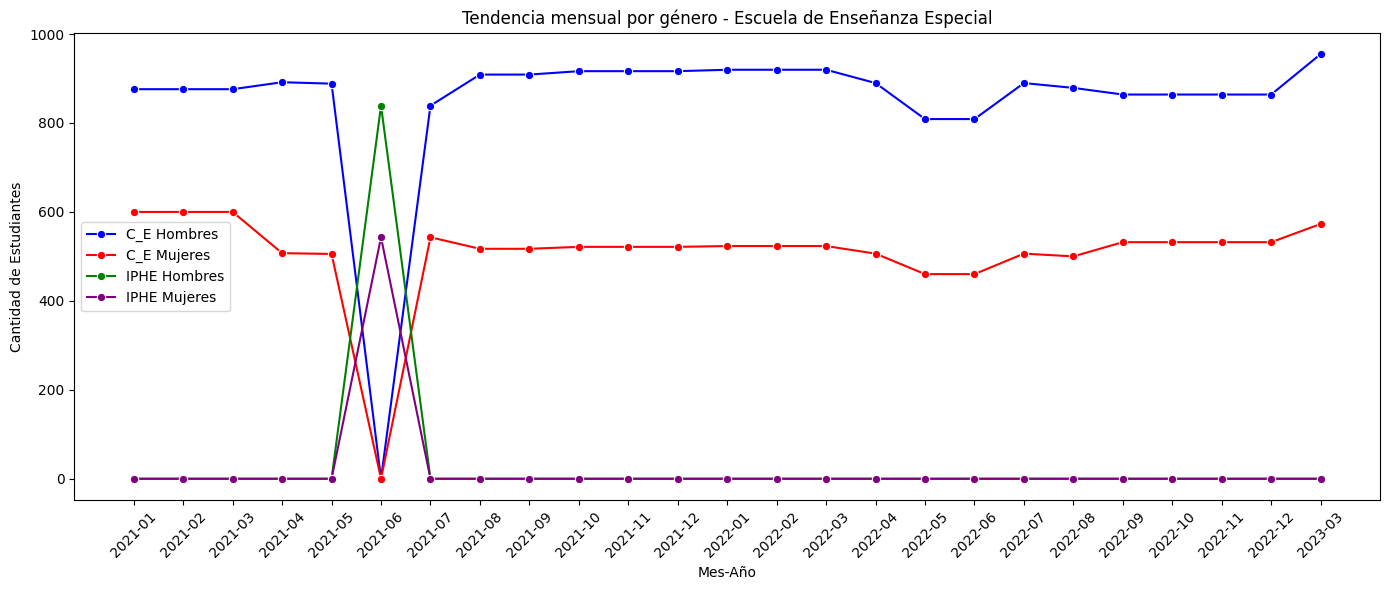

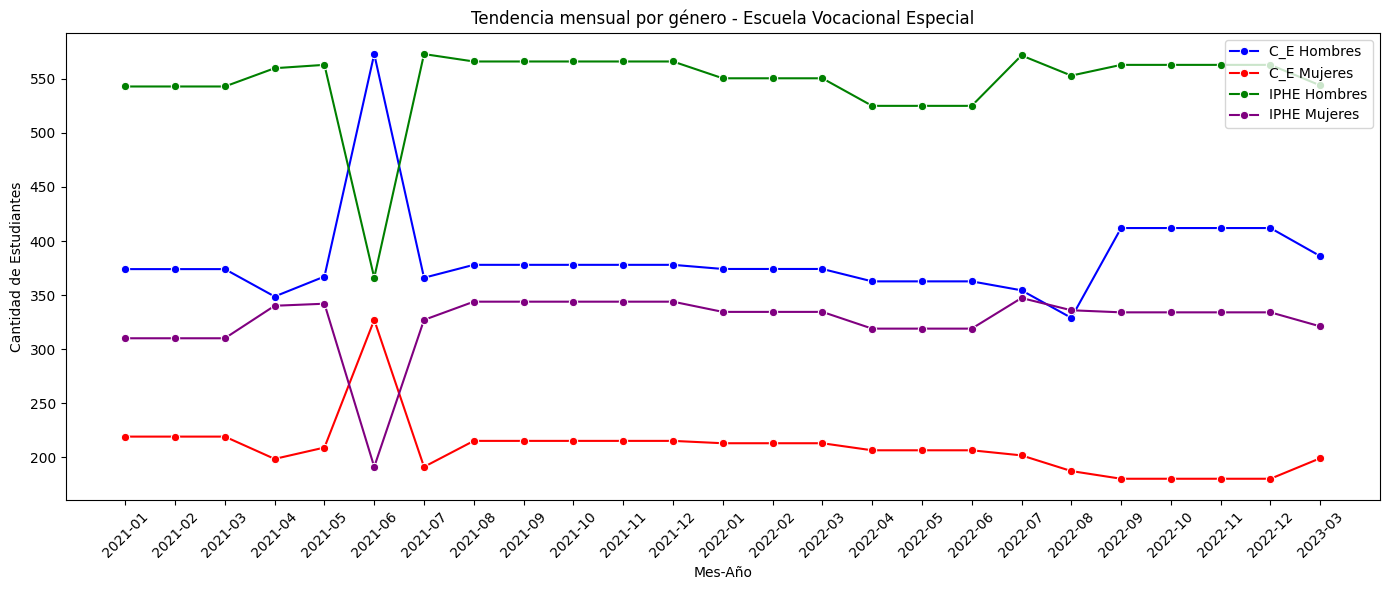

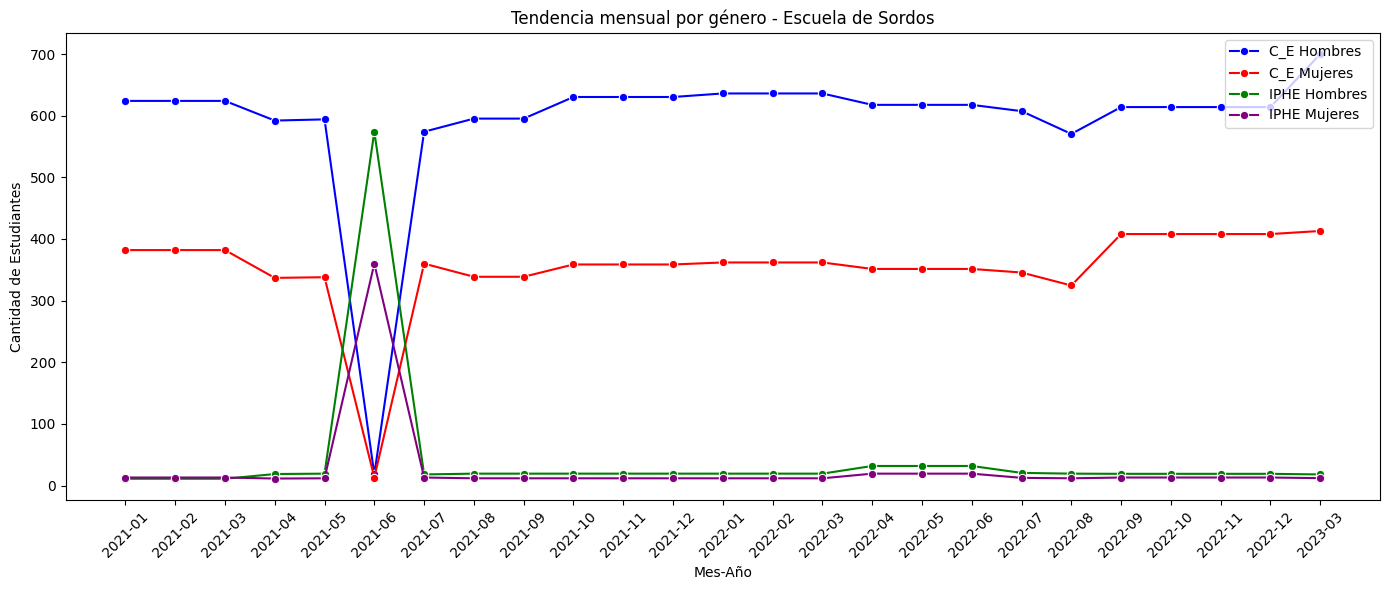

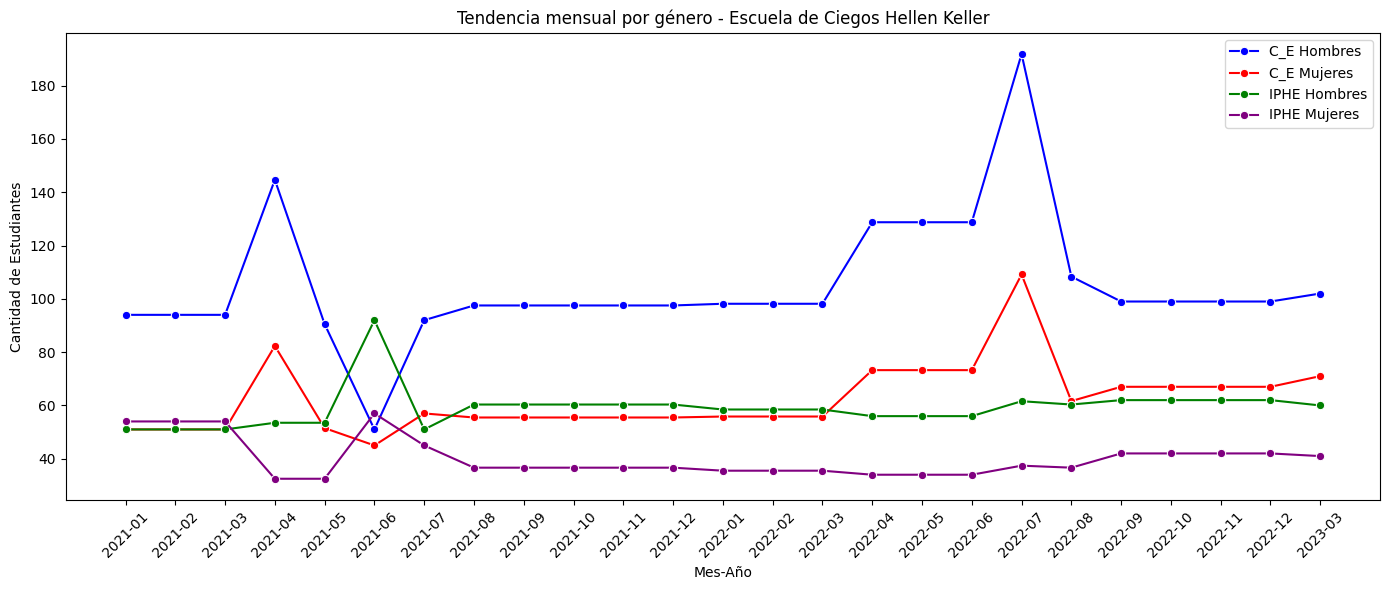

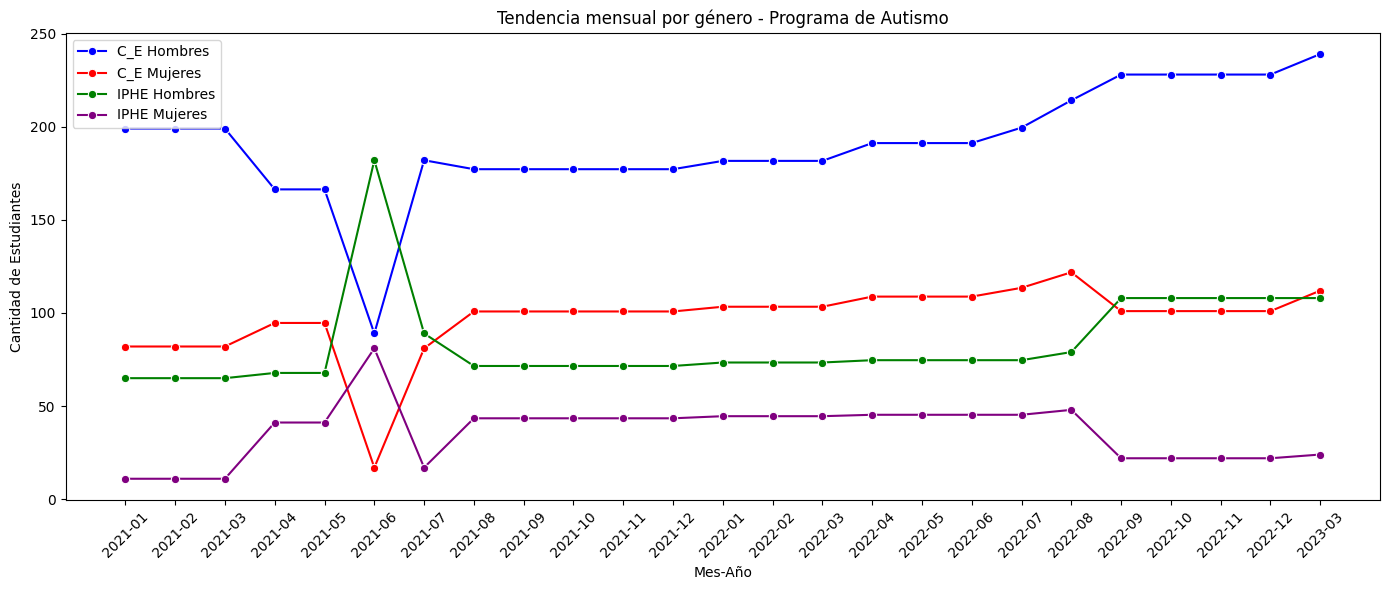

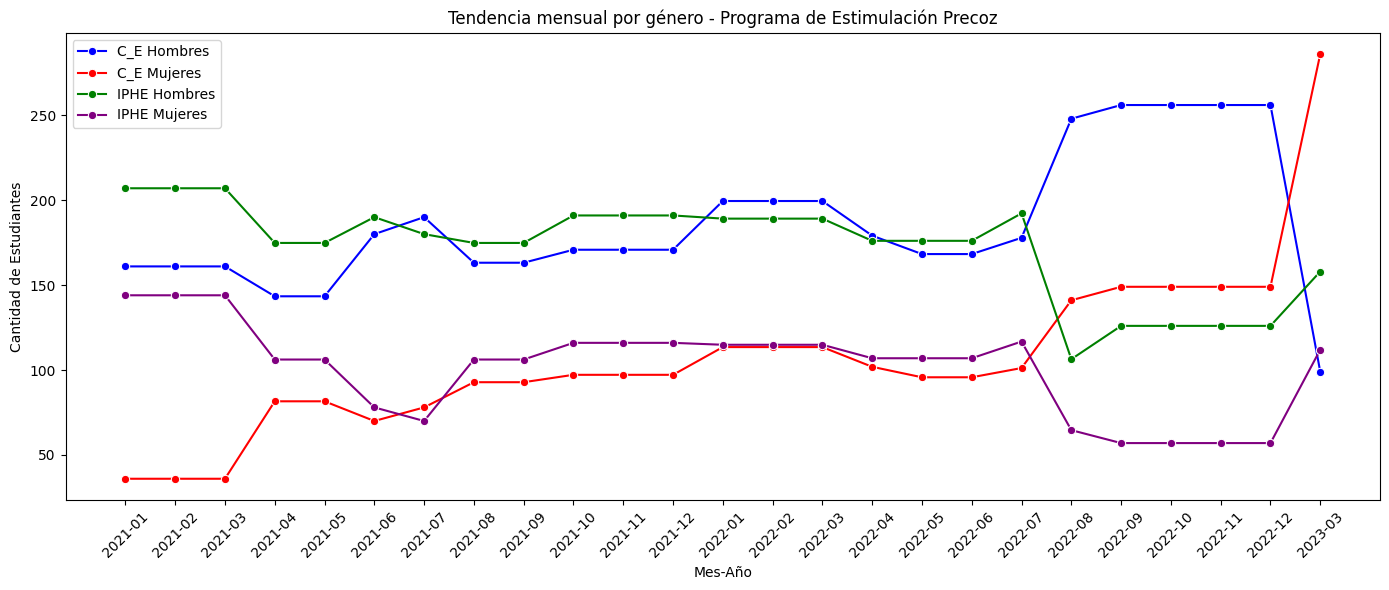

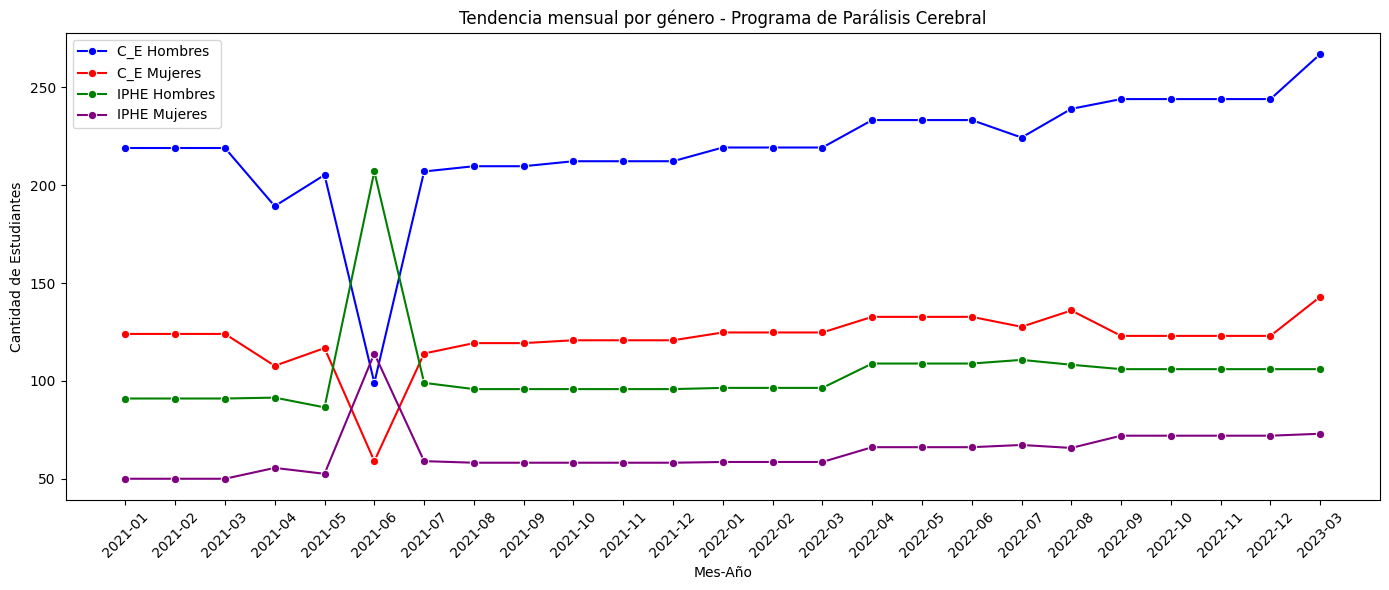

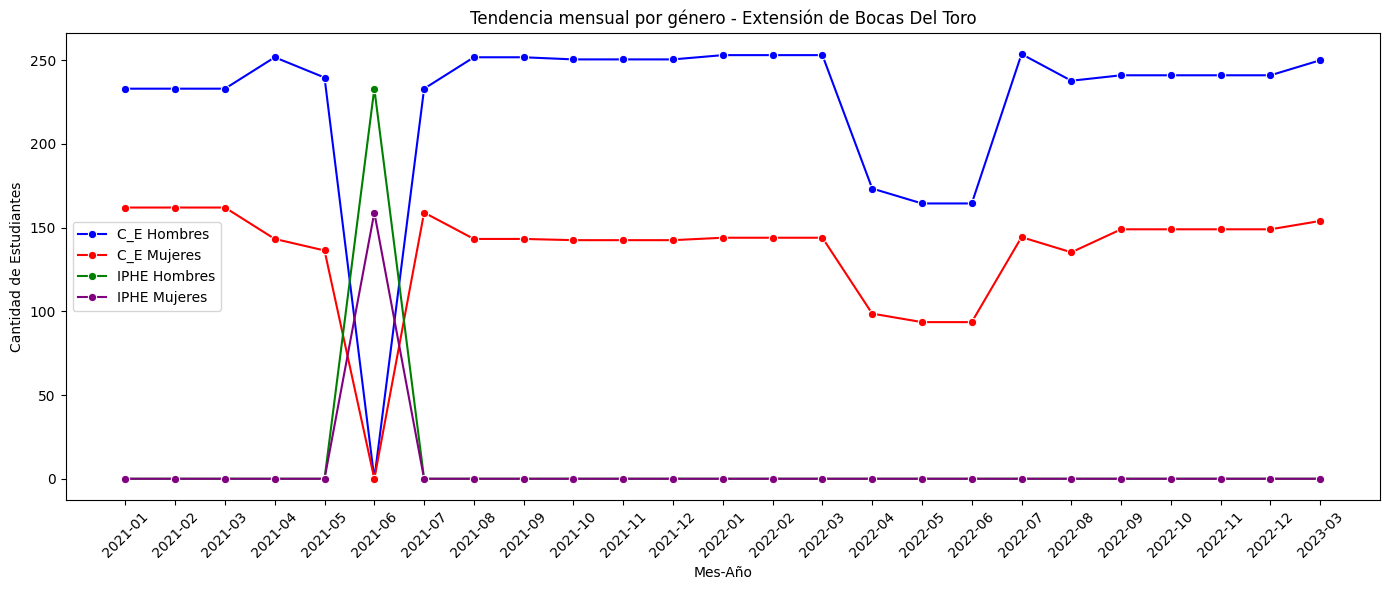

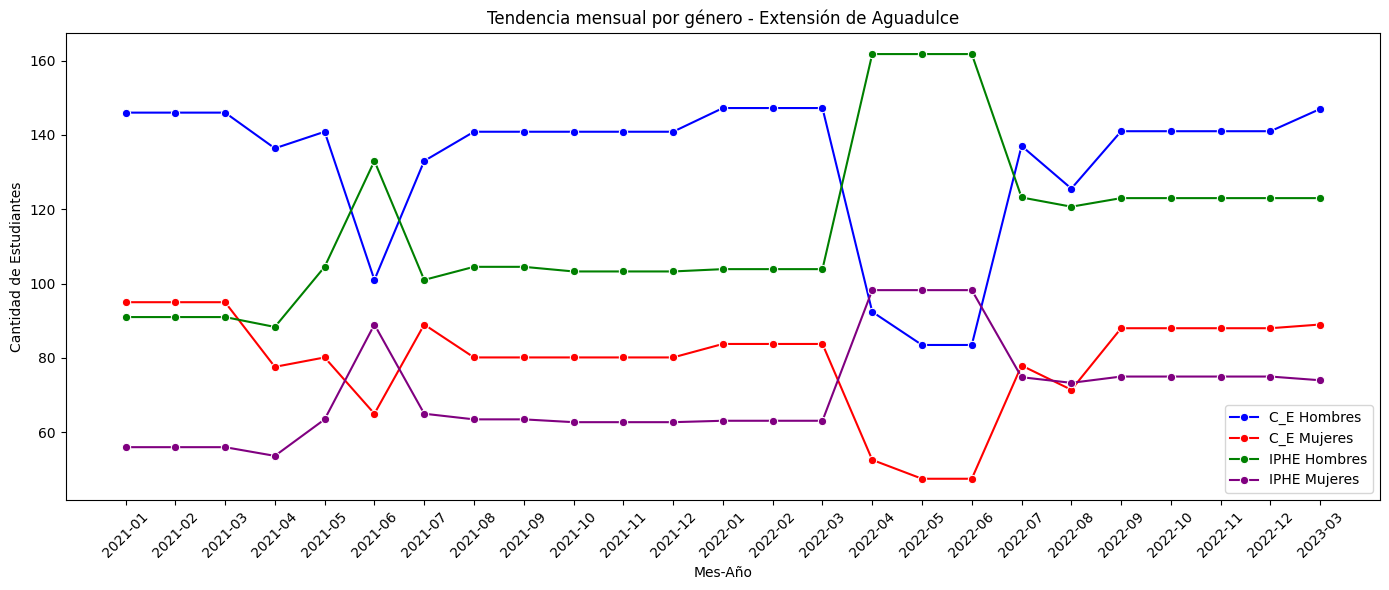

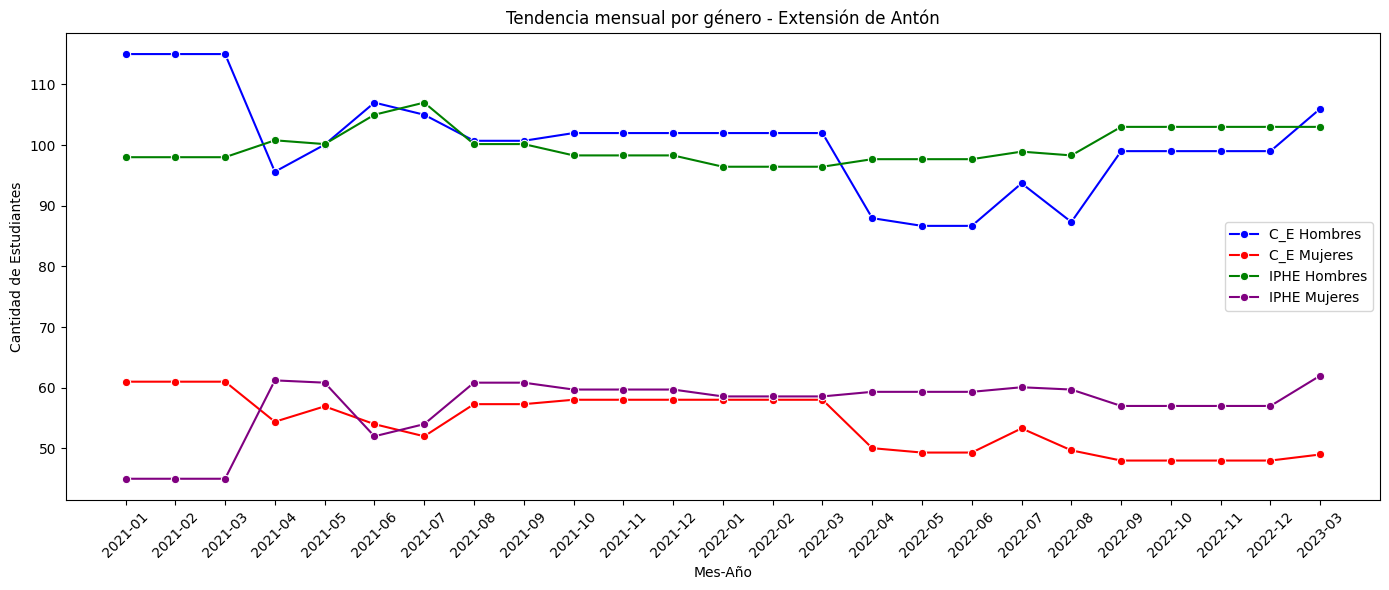

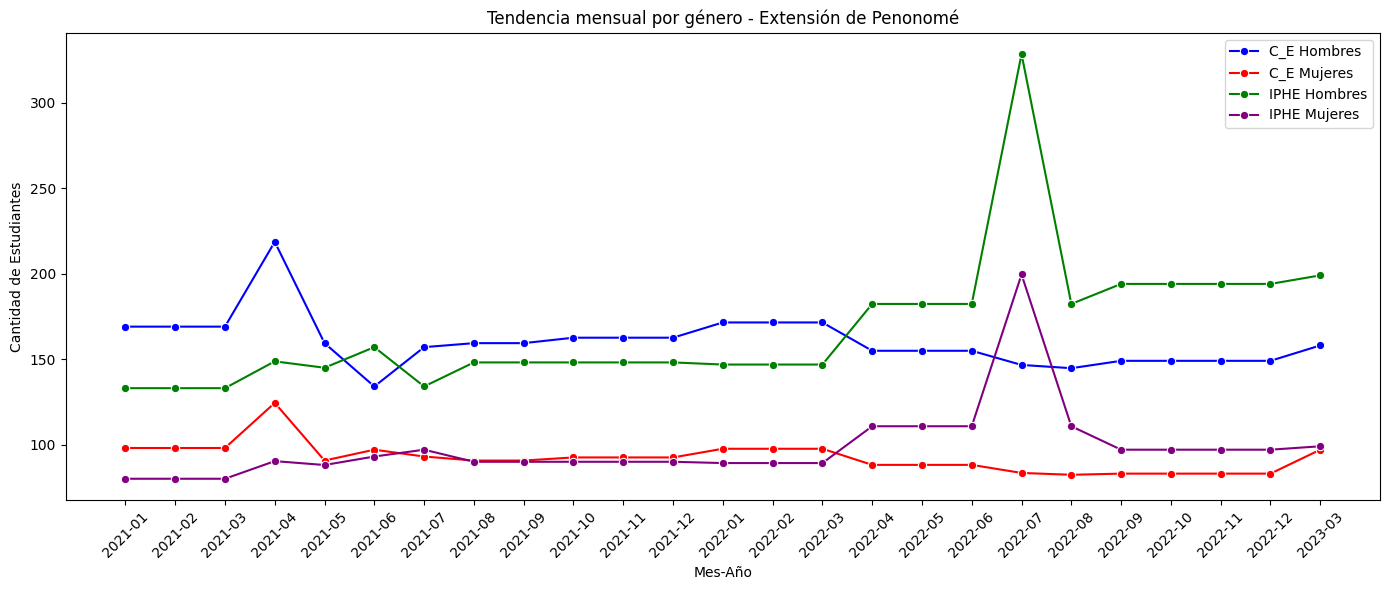

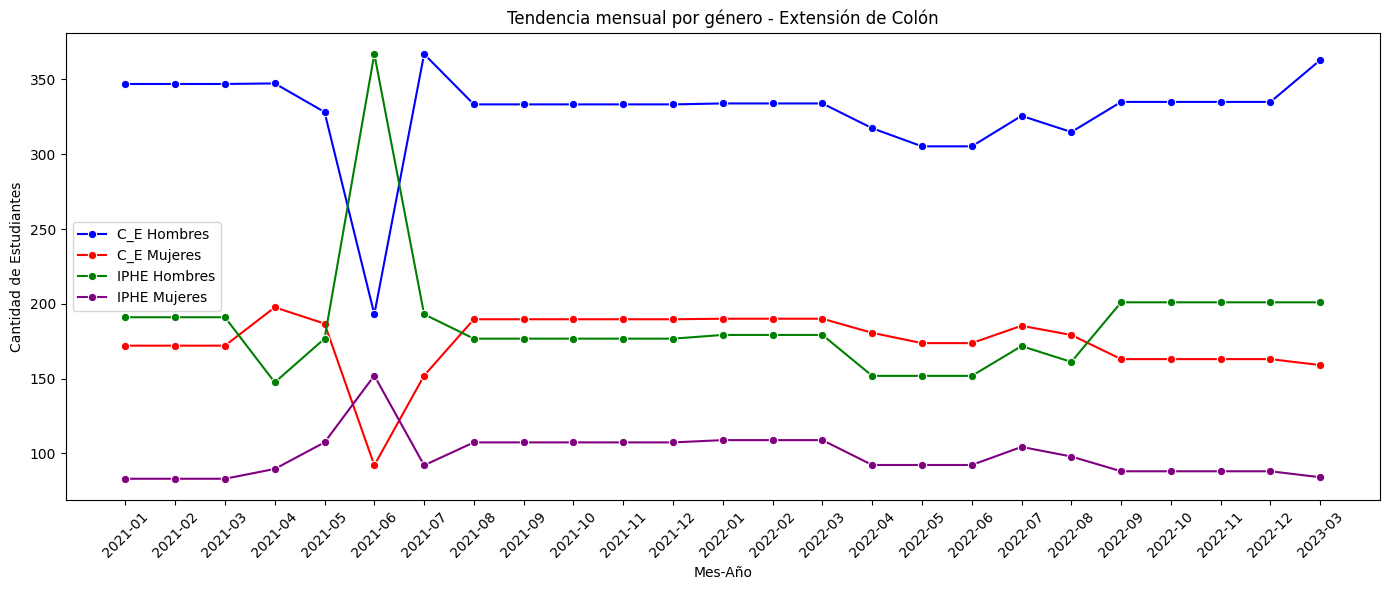

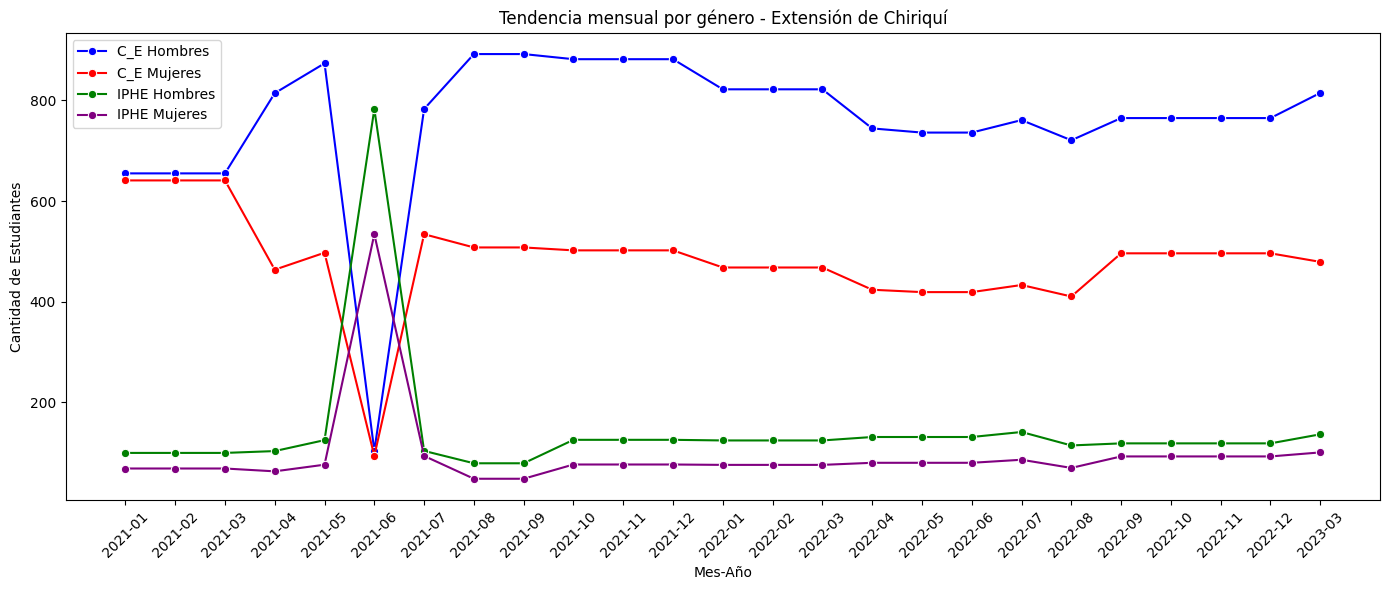

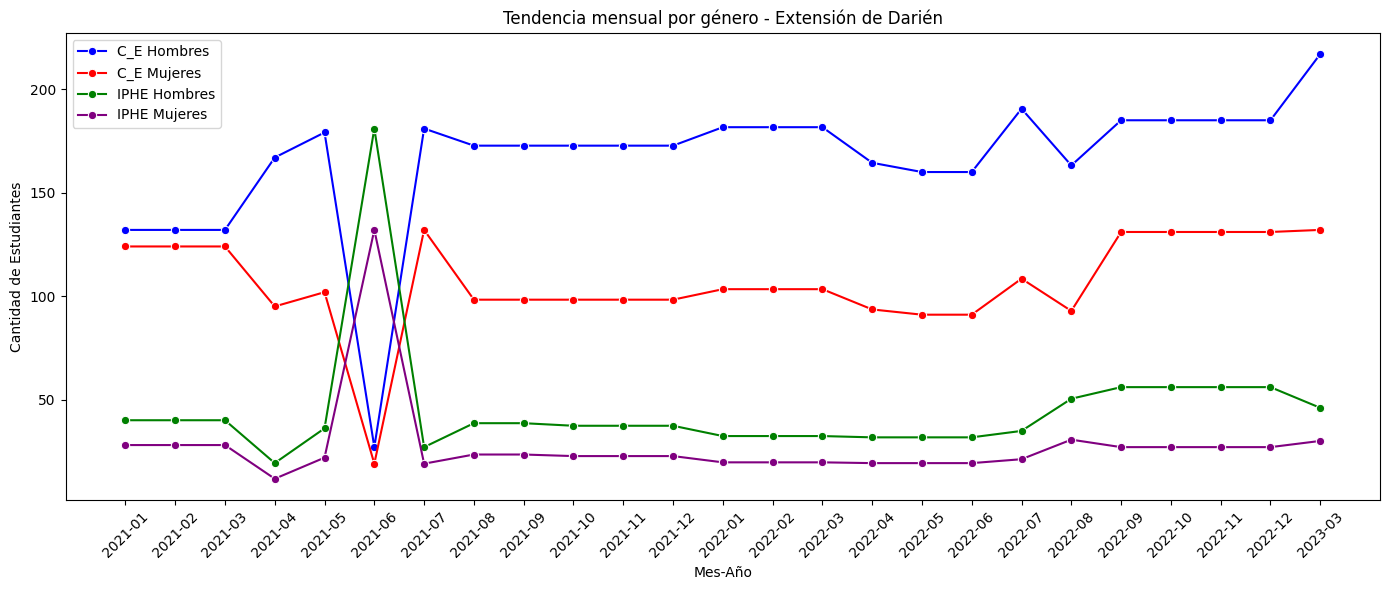

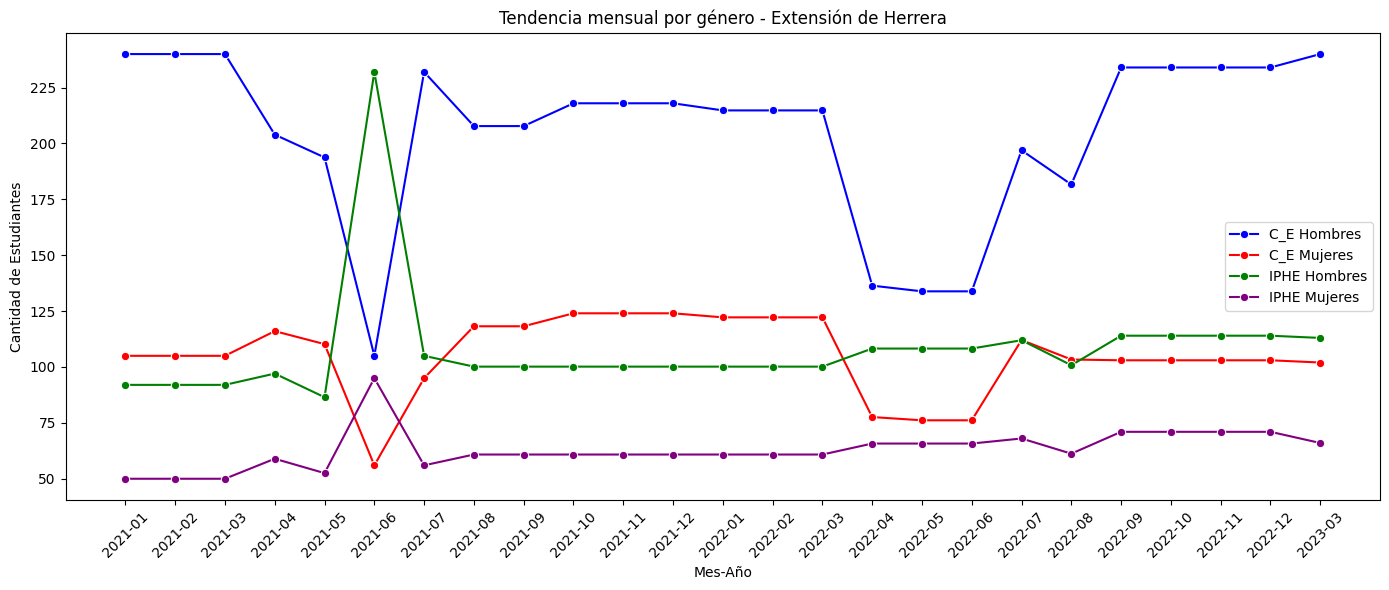

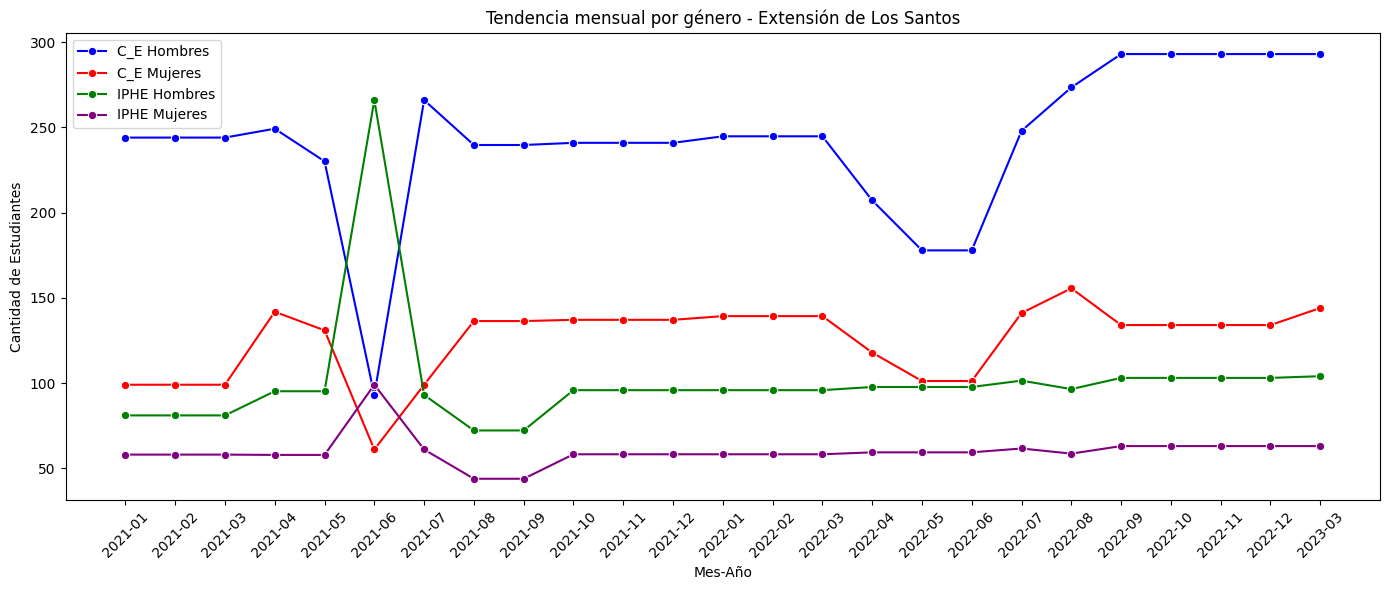

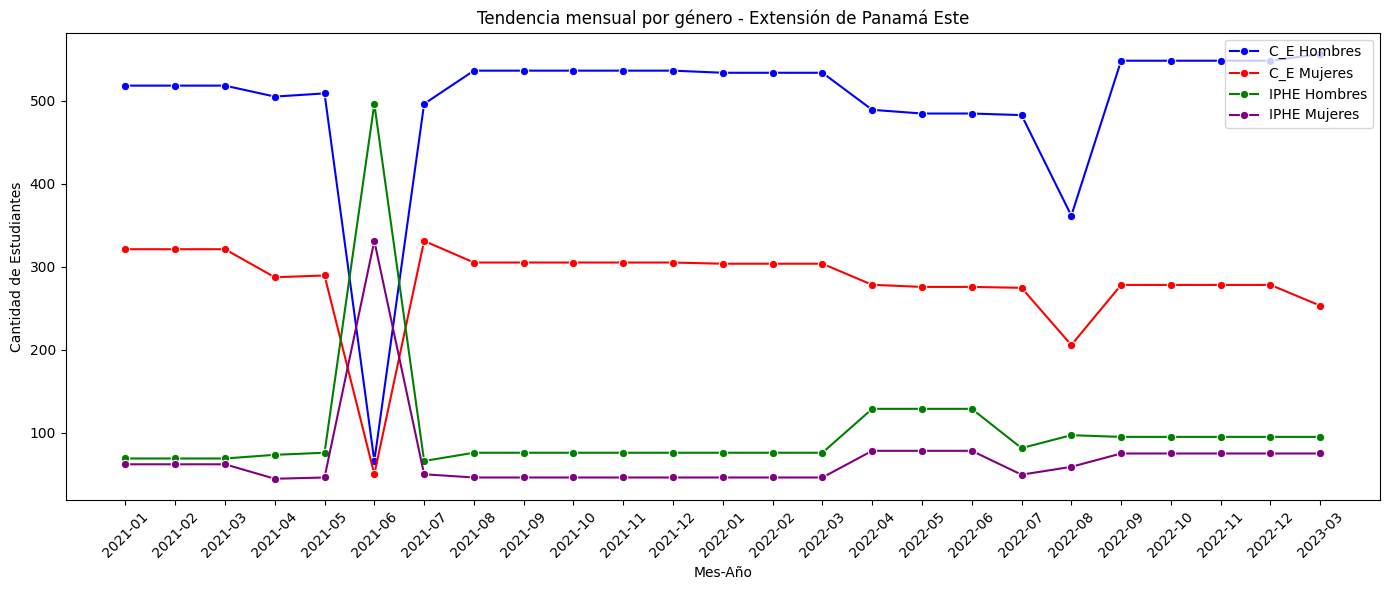

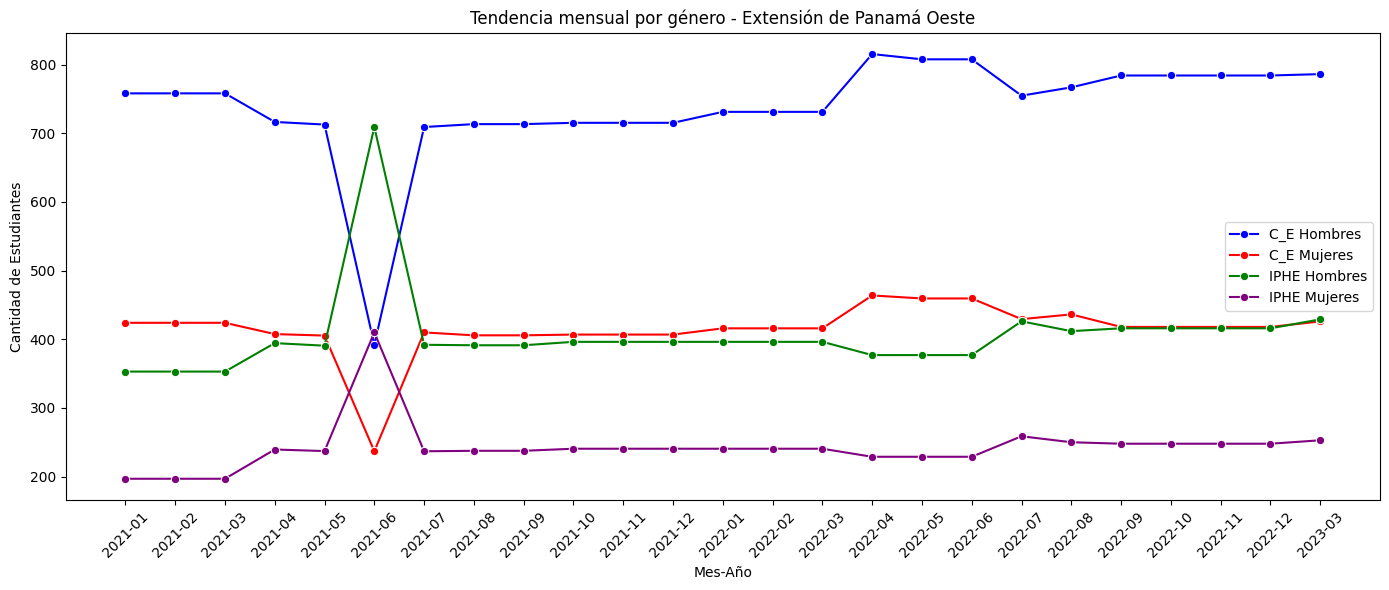

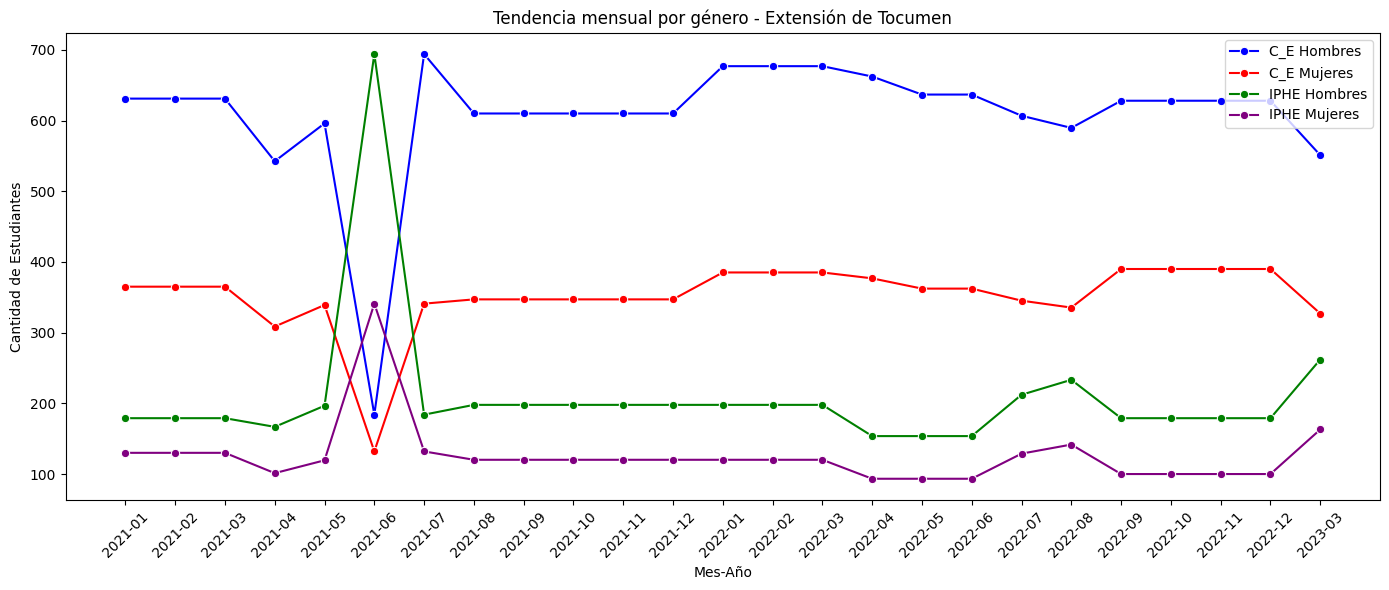

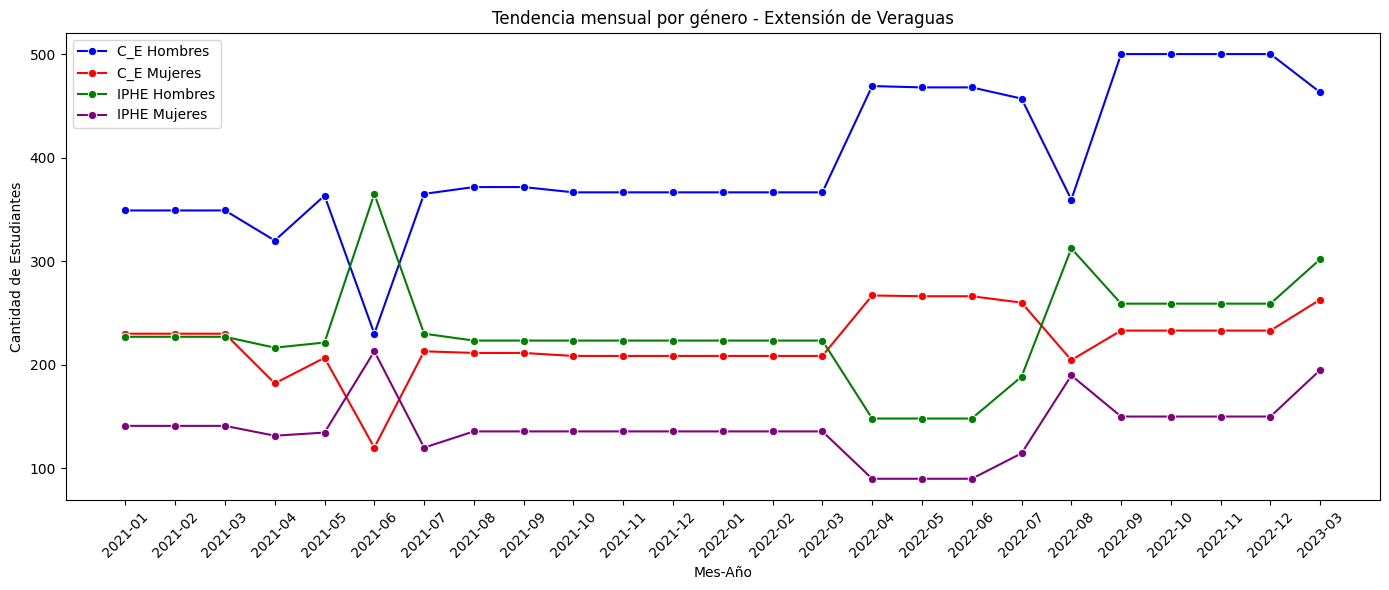

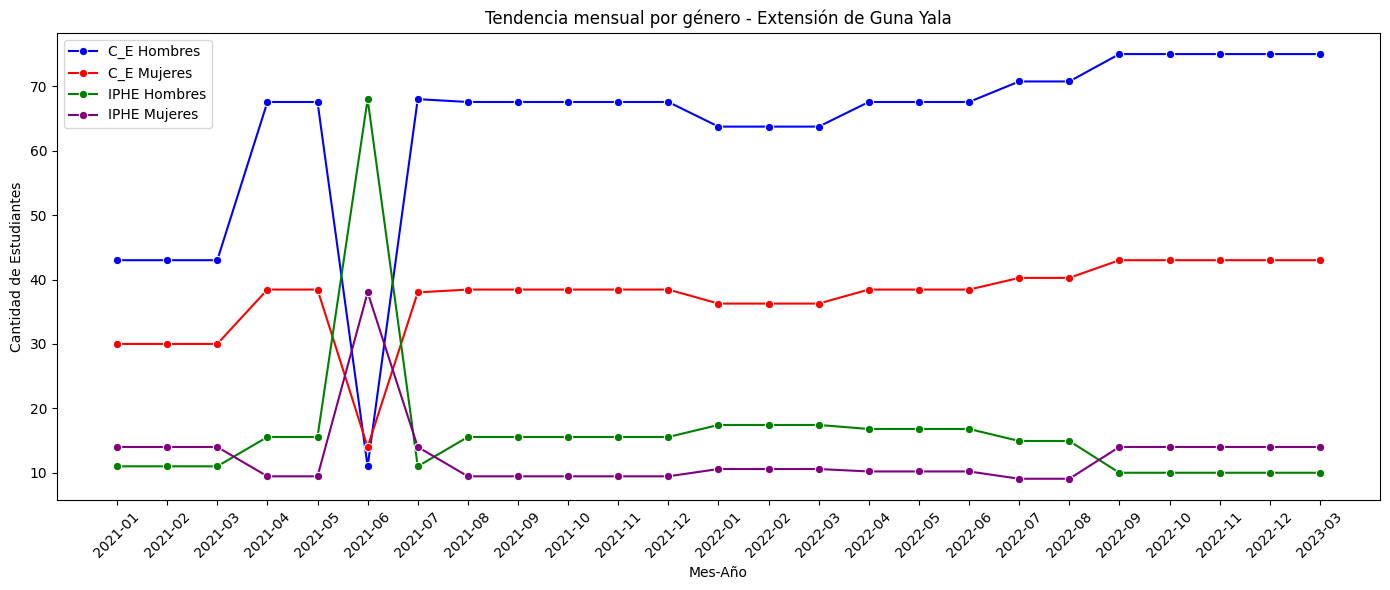

In [16]:
# Confirmando tener datetime y columnas limpias
df_limpio['Fecha_Cierre'] = pd.to_datetime(df_limpio['Fecha_Cierre'], format='%m/%d/%Y')
df_limpio['A√±o'] = df_limpio['Fecha_Cierre'].dt.year
df_limpio['Mes'] = df_limpio['Fecha_Cierre'].dt.month
df_limpio['MesA√±o'] = df_limpio['Fecha_Cierre'].dt.to_period('M').astype(str)

# Limpiar nombres de columnas por si tienen espacios
df_limpio.columns = df_limpio.columns.str.strip()

# Lista de programas a graficar
programas = [
    'Escuela de Ense√±anza Especial', 'Escuela Vocacional Especial', 'Escuela de Sordos',
    'Escuela de Ciegos Hellen Keller', 'Programa de Autismo', 'Programa de Estimulaci√≥n Precoz',
    'Programa de Par√°lisis Cerebral', 'Extensi√≥n de Bocas Del Toro', 'Extensi√≥n de Aguadulce',
    'Extensi√≥n de Ant√≥n', 'Extensi√≥n de Penonom√©', 'Extensi√≥n de Col√≥n', 'Extensi√≥n de Chiriqu√≠',
    'Extensi√≥n de Dari√©n', 'Extensi√≥n de Herrera', 'Extensi√≥n de Los Santos', 'Extensi√≥n de Panam√° Este',
    'Extensi√≥n de Panam√° Oeste', 'Extensi√≥n de Tocumen', 'Extensi√≥n de Veraguas', 'Extensi√≥n de Guna Yala'
]

# Generar gr√°fico por programa
for programa in programas:
    df_prog = df_limpio[df_limpio['Escuela, Programa, Extensi√≥n'] == programa].copy()

    if df_prog.empty:
        continue  # Saltar si no hay datos

    plt.figure(figsize=(14, 6))

    # Graficar l√≠neas de C_E
    sns.lineplot(data=df_prog, x='MesA√±o', y='C_E_Hombre', label='C_E Hombres', marker='o', color='blue')
    sns.lineplot(data=df_prog, x='MesA√±o', y='C_E_Mujer', label='C_E Mujeres', marker='o', color='red')

    # Graficar l√≠neas de IPHE
    sns.lineplot(data=df_prog, x='MesA√±o', y='IPHE_Hombre', label='IPHE Hombres', marker='o', color='green')
    sns.lineplot(data=df_prog, x='MesA√±o', y='IPHE_Mujer', label='IPHE Mujeres', marker='o', color='purple')

    plt.title(f'Tendencia mensual por g√©nero - {programa}')
    plt.xlabel('Mes-A√±o')
    plt.ylabel('Cantidad de Estudiantes')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

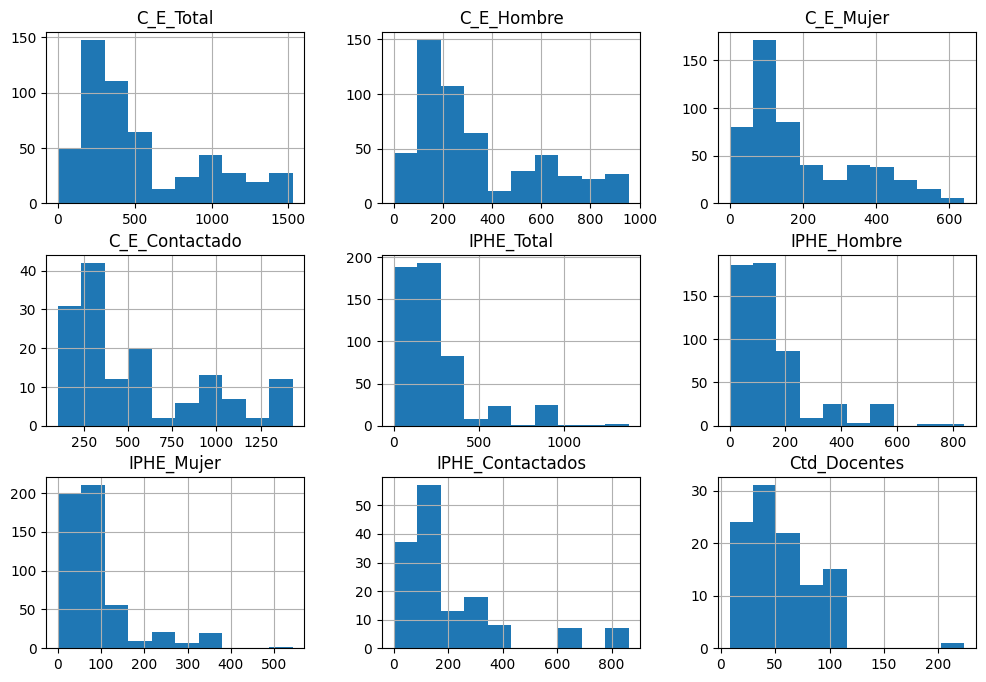

In [17]:
# Lista de columnas a evaluar se seleccionan las num√©ricas int64
columnas_numericas = [
    'C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado', 'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados', 'Ctd_Docentes'
]

df_limpio[columnas_numericas].hist(figsize=(12,8))
df_limpio.corr(numeric_only=True).style.background_gradient()

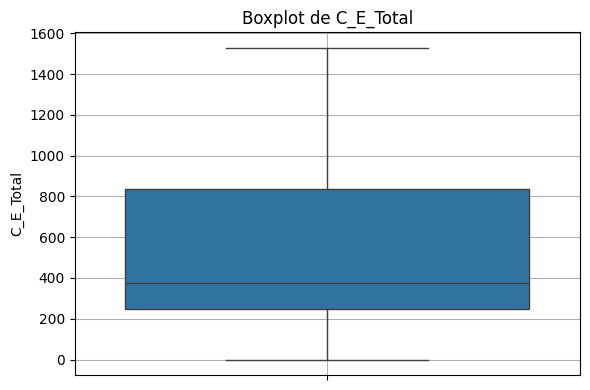

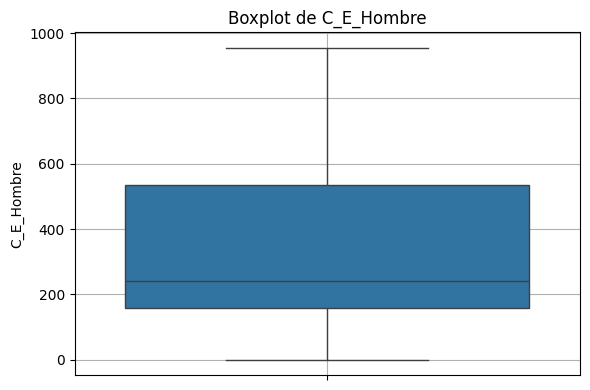

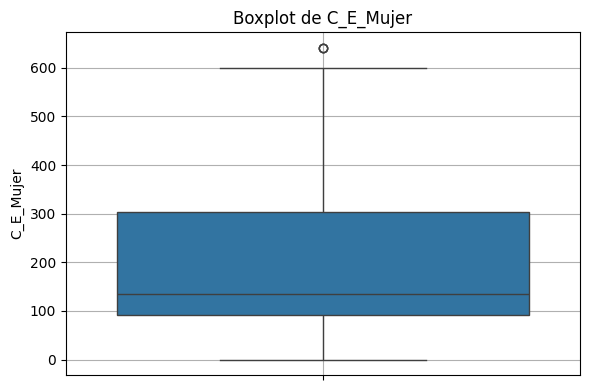

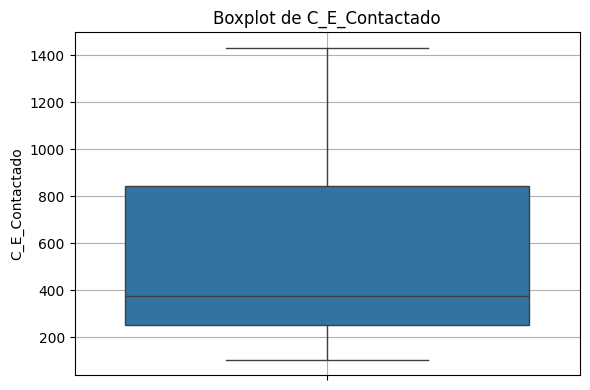

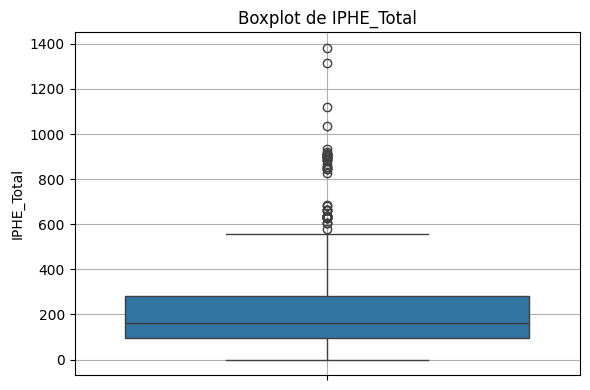

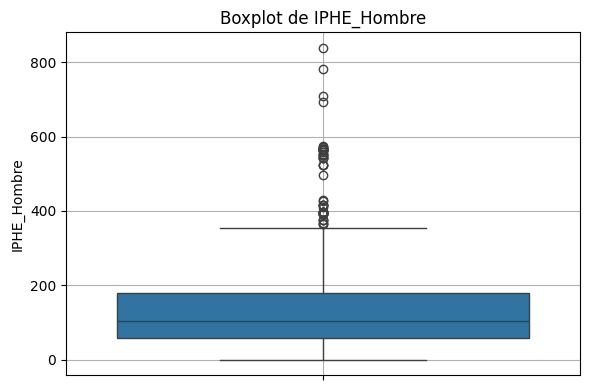

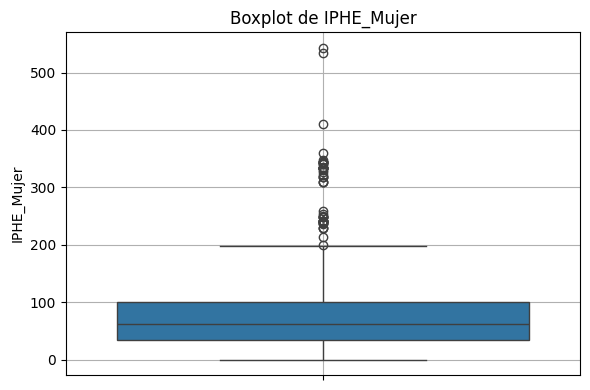

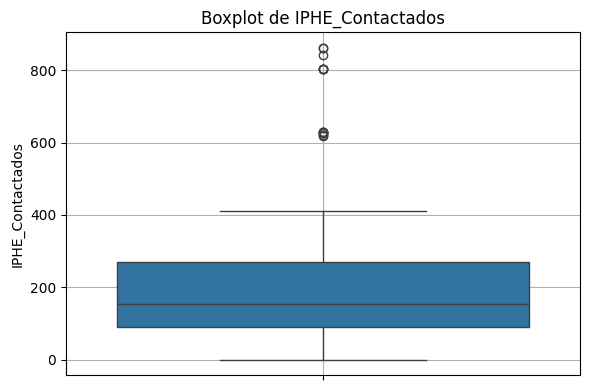

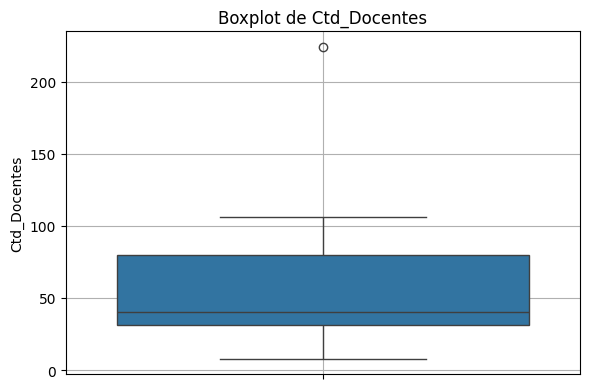

In [18]:
# Indentificar existencia de valores at√≠picos

# Eliminar espacios en nombres de columnas (por si acaso)
df_limpio.columns = df_limpio.columns.str.strip()

# Lista de columnas que quieres graficar
columnas = ['C_E_Total', 'C_E_Hombre', 'C_E_Mujer', 'C_E_Contactado',
            'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer', 'IPHE_Contactados',
            'Ctd_Docentes']

# Crear un boxplot por cada columna
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [19]:
df_limpio.to_excel('df_limpio.xlsx', index=False)

Ya he realizado todos los ajustes a el dataset, luego de tener finalmente m√≠ df_limpio quiero aplicar como t√©cnica de miner√≠a de datos al Clustering

In [47]:
# Estas son las columnas seleccionadas para el an√°lisis, que por calidad de datos
# He decidido aplicarlo a las siguiente columnas
columnas_cluster = [
    'C_E_Total', 'C_E_Hombre', 'C_E_Mujer',
    'IPHE_Total', 'IPHE_Hombre', 'IPHE_Mujer'
]

In [48]:
# Para aplicar K means debemos escalar los datos
X = df_limpio[columnas_cluster]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

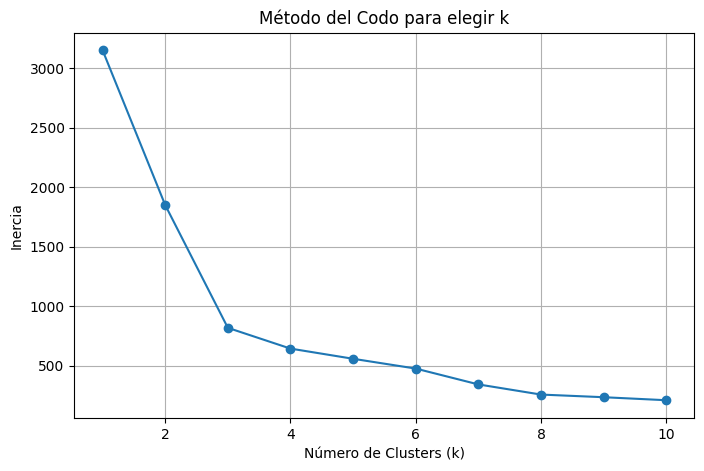

In [49]:
# Con Elbow Method la intenci√≥n es definir la k optima
# Prueba varios valores de k
inercia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Gr√°fico del Codo
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo para elegir k')
plt.grid(True)
plt.show()

El "codo" en la curva (el punto donde la pendiente deja de bajar r√°pido), Ese es el k √≥ptimo. Para m√≠ caso utilizar√© k = 3


In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [51]:
# Agrego los cluster en m√≠ df_limpio
df_limpio['Cluster'] = labels

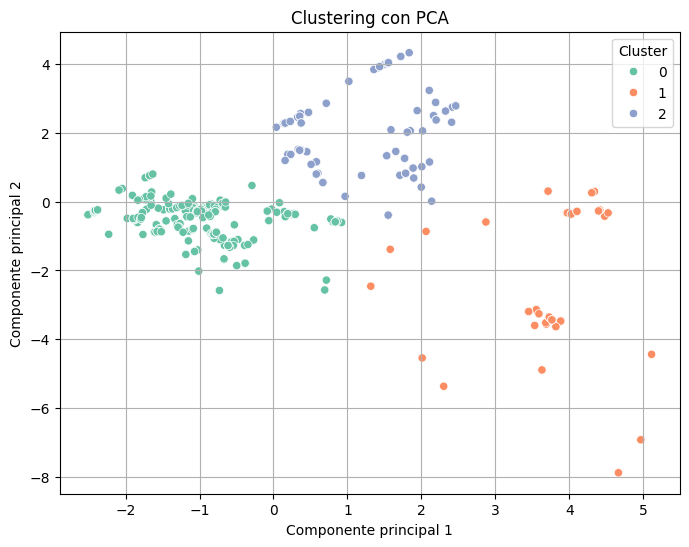

In [57]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title('Clustering con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [26]:
# c√≥mo evaluaci√≥n final a este m√©todo quer√≠a conocer la calidad
sil_score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.606


Resultado obtenido me indica que es un buen clustering

In [27]:
# Visualizaci√≥n por cluster
df_limpio.groupby('Cluster')[columnas_cluster].mean()

C_E_Total  C_E_Hombre   C_E_Mujer  IPHE_Total  IPHE_Hombre  \
Cluster                                                                 
0         291.614706  186.910578  104.704128  162.311765   102.785560   
1         791.672414  507.936802  283.735611  778.172414   486.246420   
2        1075.889764  676.156790  399.732974  147.755906    90.153921   

         IPHE_Mujer  
Cluster              
0         59.817381  
1        291.925994  
2         57.601985

In [58]:
# Mostrar los centros agrupados por cluster
programas_por_cluster = df_limpio.groupby('Cluster')['Escuela, Programa, Extensi√≥n'].unique()

# Mostrar la lista
for cluster, programas in programas_por_cluster.items():
    print(f"\nüîπ Cluster {cluster}:")
    for programa in programas:
        print(f"  - {programa}")




üîπ Cluster 0:
  - Escuela de Ciegos Hellen Keller
  - Programa de Autismo
  - Programa de Estimulaci√≥n Precoz
  - Programa de Par√°lisis Cerebral
  - Extensi√≥n de Bocas Del Toro
  - Extensi√≥n de Aguadulce
  - Extensi√≥n de Ant√≥n
  - Extensi√≥n de Penonom√©
  - Extensi√≥n de Col√≥n
  - Extensi√≥n de Dari√©n
  - Extensi√≥n de Herrera
  - Extensi√≥n de Los Santos
  - Extensi√≥n de Veraguas
  - Extensi√≥n de Guna Yala
  - Extensi√≥n de Panam√° Este

üîπ Cluster 1:
  - Escuela Vocacional Especial
  - Extensi√≥n de Panam√° Oeste
  - Escuela de Ense√±anza Especial
  - Escuela de Sordos
  - Extensi√≥n de Chiriqu√≠
  - Extensi√≥n de Panam√° Este
  - Extensi√≥n de Tocumen
  - Extensi√≥n de Veraguas

üîπ Cluster 2:
  - Escuela de Ense√±anza Especial
  - Escuela de Sordos
  - Extensi√≥n de Chiriqu√≠
  - Extensi√≥n de Panam√° Este
  - Extensi√≥n de Tocumen
  - Extensi√≥n de Veraguas


Como cloclusi√≥n podr√≠a mencionar que la segmentaci√≥n est√° bien definida ya que permite indentificar diferentes perfiles de Escuela, programa o extensi√≥n:
- Peque√±os y con poca atenci√≥n especial (Cluster 0)
- Moderados con √©nfasis en mujeres en el IPHE (Cluster 1)
- Grandes con alta atenci√≥n (cluster 2)

Iniciar√© el proceso para transformar ahora a un modelo supervisado

In [41]:

# Extraer A√±o y Mes
df_limpio['A√±o'] = df_limpio['Fecha_Cierre'].dt.year
df_limpio['Mes'] = df_limpio['Fecha_Cierre'].dt.month

# Preparar X y y (ahora sin 'Fecha_Cierre')
X = df_limpio[['A√±o', 'Mes', 'Escuela, Programa, Extensi√≥n']]
y_ce = df_limpio['C_E_Total']
y_iphe = df_limpio['IPHE_Total']

# Preprocesamiento
preprocesador = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Escuela, Programa, Extensi√≥n'])
], remainder='passthrough')

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
model_rf = make_pipeline(preprocesador, RandomForestRegressor(n_estimators=100, random_state=42))

In [31]:
model_gb = make_pipeline(preprocesador, GradientBoostingRegressor(n_estimators=100, random_state=42))


In [32]:
model_xgb = make_pipeline(preprocesador, XGBRegressor(n_estimators=100, random_state=42))

In [38]:
modelos = {
    "Random Forest": make_pipeline(preprocesador, RandomForestRegressor(n_estimators=100, random_state=42)),
    "Gradient Boosting": make_pipeline(preprocesador, GradientBoostingRegressor(n_estimators=100, random_state=42)),
    "XGBoost": make_pipeline(preprocesador, XGBRegressor(n_estimators=100, random_state=42))
}

objetivos = {
    "C_E_Total": y_ce,
    "IPHE_Total": y_iphe
}

for objetivo_nombre, y in objetivos.items():
    print(f"\n M√©tricas para la variable: {objetivo_nombre}")
    for modelo_nombre, modelo in modelos.items():
        mae = -cross_val_score(modelo, X, y, cv=kf, scoring='neg_mean_absolute_error').mean()
        r2 = cross_val_score(modelo, X, y, cv=kf, scoring='r2').mean()
        print(f"{modelo_nombre} ‚Üí MAE: {mae:.2f}, R¬≤: {r2:.2f}")


 M√©tricas para la variable: C_E_Total
Random Forest ‚Üí MAE: 46.13, R¬≤: 0.90
Gradient Boosting ‚Üí MAE: 65.49, R¬≤: 0.90
XGBoost ‚Üí MAE: 44.82, R¬≤: 0.90

 M√©tricas para la variable: IPHE_Total
Random Forest ‚Üí MAE: 38.66, R¬≤: 0.72
Gradient Boosting ‚Üí MAE: 42.05, R¬≤: 0.77
XGBoost ‚Üí MAE: 37.01, R¬≤: 0.72


In [70]:
# Lista de centros
centros = ['Escuela de Ense√±anza Especial', 'Escuela Vocacional Especial', 'Escuela de Sordos',
           'Escuela de Ciegos Hellen Keller', 'Programa de Autismo', 'Programa de Estimulaci√≥n Precoz',
           'Programa de Par√°lisis Cerebral', 'Extensi√≥n de Bocas Del Toro', 'Extensi√≥n de Aguadulce',
           'Extensi√≥n de Ant√≥n', 'Extensi√≥n de Penonom√©', 'Extensi√≥n de Col√≥n', 'Extensi√≥n de Chiriqu√≠',
           'Extensi√≥n de Dari√©n', 'Extensi√≥n de Herrera', 'Extensi√≥n de Los Santos', 'Extensi√≥n de Panam√° Este',
           'Extensi√≥n de Panam√° Oeste', 'Extensi√≥n de Tocumen', 'Extensi√≥n de Veraguas', 'Extensi√≥n de Guna Yala']

# Crear combinaciones de centros, a√±os y meses
a√±os = [2025, 2026]
meses = list(range(1, 13))
combinaciones = list(product(centros, a√±os, meses))

# Crear DataFrame
X_future = pd.DataFrame(combinaciones, columns=['Escuela, Programa, Extensi√≥n', 'A√±o', 'Mes'])

# Crear la columna Fecha_Cierre
X_future['Fecha_Cierre'] = pd.to_datetime({
    'year': X_future['A√±o'],
    'month': X_future['Mes'],
    'day': 1
})

# Dejar columnas necesarias para predicci√≥n
X_future_model = X_future[['Escuela, Programa, Extensi√≥n', 'A√±o', 'Mes']]

In [75]:
# Generar predicciones (esto debe dar 504 valores)
y_pred_ce = model_xgb_ce.predict(X_future_model)
y_pred_iphe = model_xgb_iphe.predict(X_future_model)

In [76]:
df_predicciones = X_future_model.copy()

df_predicciones['Predicci√≥n C_E_Total'] = y_pred_ce
df_predicciones['Predicci√≥n IPHE_Total'] = y_pred_iphe

# Agregar Fecha_Cierre como √∫ltimo d√≠a del mes
df_predicciones['Fecha_Cierre'] = pd.to_datetime(dict(
    year=df_predicciones['A√±o'],
    month=df_predicciones['Mes'],
    day=1
)) + pd.offsets.MonthEnd(0)

In [77]:
# Guardar como archivo Excel
df_predicciones.to_excel("df_predicciones.xlsx", index=False, engine='openpyxl')

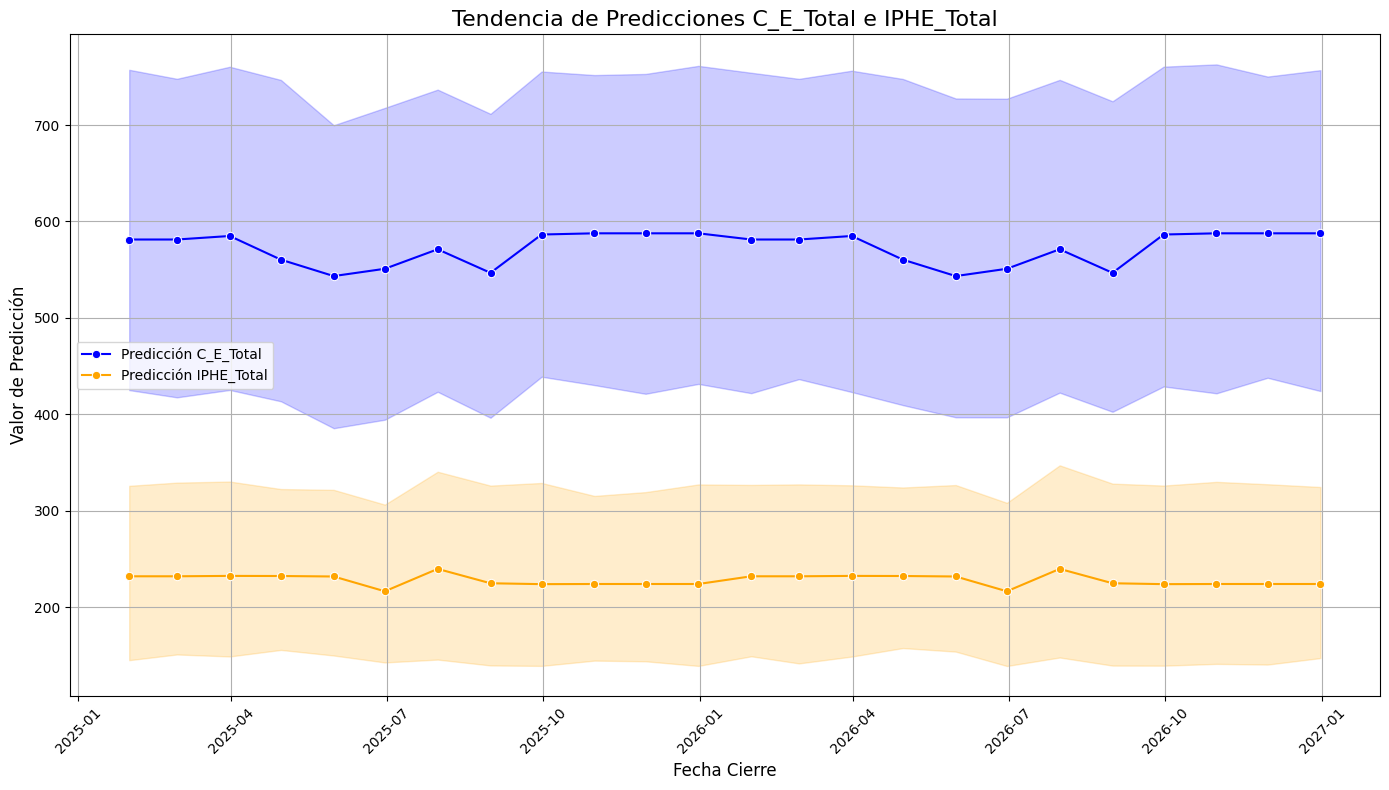

In [78]:
# Aseg√∫rate de que 'Fecha_Cierre' est√© en formato datetime
df_predicciones['Fecha_Cierre'] = pd.to_datetime(df_predicciones['Fecha_Cierre'])

# Establecer el tama√±o de la figura
plt.figure(figsize=(14, 8))

# Graficar Predicci√≥n C_E_Total
sns.lineplot(data=df_predicciones, x='Fecha_Cierre', y='Predicci√≥n C_E_Total', label='Predicci√≥n C_E_Total', marker='o', color='blue')

# Graficar Predicci√≥n IPHE_Total
sns.lineplot(data=df_predicciones, x='Fecha_Cierre', y='Predicci√≥n IPHE_Total', label='Predicci√≥n IPHE_Total', marker='o', color='orange')

# A√±adir t√≠tulo y etiquetas
plt.title('Tendencia de Predicciones C_E_Total e IPHE_Total', fontsize=16)
plt.xlabel('Fecha Cierre', fontsize=12)
plt.ylabel('Valor de Predicci√≥n', fontsize=12)

# A√±adir leyenda
plt.legend()

# Mostrar la cuadr√≠cula
plt.grid(True)

# Mostrar la gr√°fica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Crear un nuevo DataFrame solo con las predicciones relevantes
df_predicciones = X_future[['Fecha_Cierre', 'Escuela, Programa, Extensi√≥n', 'A√±o', 'Mes',
                            'Predicci√≥n C_E_Total', 'Predicci√≥n IPHE_Total']]

# Ver resultado
print(df_predicciones.head())
df_predicciones.to_excel("predicciones_iphe.xlsx", index=False)

  Fecha_Cierre     Escuela, Programa, Extensi√≥n   A√±o  Mes  \
0   2025-01-01    Escuela de Ense√±anza Especial  2025    1   
1   2025-01-01      Escuela Vocacional Especial  2025    1   
2   2025-01-01                Escuela de Sordos  2025    1   
3   2025-01-01  Escuela de Ciegos Hellen Keller  2025    1   
4   2025-01-01              Programa de Autismo  2025    1   

   Predicci√≥n C_E_Total  Predicci√≥n IPHE_Total  
0           1521.432007              -0.594219  
1            589.627258             870.232666  
2           1097.600098              31.414806  
3            173.279099             105.159233  
4            350.850098             131.818008  


In [65]:
readme_content =  """
üìÑ README.txt ‚Äì An√°lisis y Predicci√≥n de Matr√≠cula en el IPHE Panam√° (2021‚Äì2026)

 Descripci√≥n del Proyecto
Este proyecto analiza y predice la matr√≠cula de estudiantes en los diferentes centros y programas del Instituto Paname√±o de Habilitaci√≥n Especial (IPHE), con el objetivo de apoyar la toma de decisiones en pol√≠ticas p√∫blicas sobre educaci√≥n inclusiva. Utiliza datos mensuales publicados por el IPHE entre 2021 y 2023, aplicando modelos de machine learning y an√°lisis de agrupamiento (clustering) para identificar tendencias y proyecciones futuras.

Archivos Necesarios
- Dataset: iphe_estadisticas_2021_2023.xlsx
- Ubicaci√≥n recomendada: Carpeta del notebook
- Fuente oficial: https://www.datosabiertos.gob.pa

Requisitos T√©cnicos
Estan instaladas las siguientes librer√≠as de Python:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Estructura del An√°lisis
1. Carga y limpieza de datos
2. An√°lisis exploratorio de los datos
3. An√°lisis de Clusters
2. Modelado predictivo
4. Predicciones futuras
5. Visualizaci√≥n

Instrucciones para Ejecutar
1. Abre el archivo An√°lisisIPHEestadistica.ipynb en Jupyter Notebook o Google Colab.
2. Aseg√∫rate de que el archivo iphe_estadisticas_2021_2023.xlsx est√© disponible.
3. Ejecuta todas las celdas del notebook.
4. Observa las predicciones y an√°lisis generados.

Resultados Esperados
- Predicciones del total de estudiantes atendidos (C_E_Total) por mes.
- Predicciones del total general atendido por el IPHE (IPHE_Total).
- Identificaci√≥n de patrones y agrupamientos entre programas similares.
- Visualizaci√≥n de tendencias estacionales o crecientes.

Impacto del Proyecto
Este an√°lisis busca influenciar pol√≠ticas p√∫blicas sobre educaci√≥n inclusiva en Panam√°, justificando la necesidad de:
- Mayor infraestructura especializada.
- Contrataci√≥n de personal capacitado.
- Planificaci√≥n a largo plazo para el aumento sostenido de estudiantes con necesidades especiales.
"""

with open("README.txt", "w", encoding="utf-8") as file:
    file.write(readme_content)

print("Archivo README.txt generado con √©xito.")

Archivo README.txt generado con √©xito.
